In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

* 오차 행렬(혼동 행렬) 생성

In [5]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]], dtype=int64)

* 정확도

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

예측값과 실제 값이 높은 확률로 동일한 것을 알 수 있다

* 정밀도

In [7]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.900990099009901

positive 예측 성능이 높은 편이다

* 재현율

In [8]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

현재 데이터는 암 판단 모델로 positive인 환자를 negative로 잘못 판단했을 경우 대가가 심각하므로 재현율은 중요한 평가 지표다.

* F1 score

In [9]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [12]:
from sklearn.preprocessing import Binarizer
pred_proba = model_lor.predict_proba(X)
custom_threshold = 0.1
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
y_pred2 = binarizer.transform(pred_proba_1)

In [13]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
confusion = confusion_matrix(y,y_pred2)
accuracy = accuracy_score(y,y_pred2)
precision = precision_score(y,y_pred2)
recall = recall_score(y,y_pred2)
f1 = f1_score(y,y_pred2)

In [14]:
print("혼동행렬: {}, 정확도:{}, 정밀도:{}, :재현율:{}, f1:{}".format(confusion, accuracy, precision, recall, f1))

혼동행렬: [[267  90]
 [  6 206]], 정확도:0.8312829525483304, 정밀도:0.6959459459459459, :재현율:0.9716981132075472, f1:0.8110236220472441


* ROC 곡선 시각화

In [16]:
from sklearn.metrics import roc_curve 
fprs, tprs, thresholds = roc_curve(y, pred_proba_1)

Text(0, 0.5, 'TPR(Recall)')

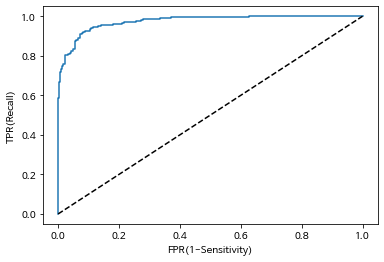

In [19]:
import matplotlib.pyplot as plt 
plt.plot(fprs, tprs, label="ROC")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')

* ROC AUC 값

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, pred_proba_1)

0.9740632101897363